# Term Project
- The purpose of this project is to try different classification methods and apply best practices.

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Below script is to ignore some unnecssary warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data602_exam.csv")
df.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
0,3.0,3.0,689.0,18.000000,6.0,890.0,6.000000,39.0,17.000000,88.0,...,-208196.847822,149454.443336,330552.774213,133907.410063,44038.800343,55156.067737,-77588.974897,171979.000000,162674.0,2
1,3.0,3.0,583.0,15.000000,5.0,1574.0,8640.382774,6.0,7.000000,30.0,...,36209.864030,221318.549792,-1568.194718,22651.037591,-144906.975987,-33489.566102,157701.356695,7702.000000,6551.0,8
2,3.0,4.0,2796.0,15.000000,5.0,625.0,5.000000,58.0,11.000000,152.0,...,88398.670923,66550.556919,5404.362294,13947.925003,-48559.885445,257023.562444,-204889.973046,151324.169975,12946.0,6
3,3.0,3.0,373.0,2726.071722,9.0,615.0,9.000000,16.0,98583.277889,34.0,...,-157101.258148,-60336.395075,157629.928962,117458.409503,62076.273381,98733.489947,-51461.636374,122247.000000,98621.0,4
4,3.0,3.0,77.0,12.000000,4.0,66.0,91945.635853,3.0,0.000000,5.0,...,32595.648968,-228909.737896,-87033.363460,131606.196188,-118625.690367,89326.297602,-84991.427204,15501.000000,11864.0,1


# EDA

## Here it is how we have observed the segregation of the data.
#### Types
- Registers

The number of times various different registers are called

- Opcodes

The number of times various different opcodes are called

- APIs

The number of times various different extern system functions are called. 

- Misc

The number of times various kinds of variables are defined. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Columns: 1805 entries, Virtual to target
dtypes: float64(1804), int64(1)
memory usage: 68.8 MB


### For each of the columns the means varies a lot, we have to scale the data to get the proper predictions.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Virtual,4999.0,2413.316145,12506.374487,0.000000,3.000000,3.000000,4.000000,99416.349008
Offset,4999.0,2659.311487,13159.966494,0.000000,3.000000,3.000000,4.000000,99973.742656
loc,4999.0,4424.891220,13604.624599,0.000000,77.000000,526.000000,1977.500000,107775.000000
Import,4999.0,2291.214822,11996.827931,0.000000,6.000000,12.000000,18.000000,99364.479576
Imports,4999.0,2512.272757,12656.467627,0.000000,4.000000,4.000000,7.000000,99838.164777
...,...,...,...,...,...,...,...,...
Img104,4999.0,22032.274639,109858.578170,-410986.193796,-50016.264131,21454.161075,96288.509357,443685.869973
Img105,4999.0,9505.453675,106876.987983,-355679.953652,-63550.766114,9709.062906,82107.827536,437127.690431
Img106,4999.0,70574.781259,67871.038272,0.000000,13387.000000,67890.000000,88771.000000,412076.355373
Img107,4999.0,54803.742148,53395.251409,0.000000,8117.000000,49865.000000,68589.500000,300241.000000


## As we can see in the below graph there are no spots
Which means there are no null values in the data

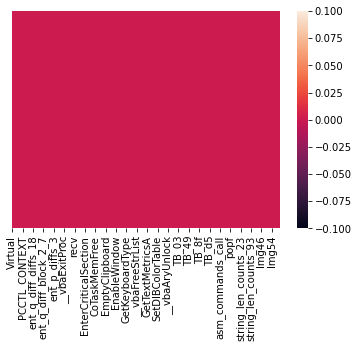

In [6]:
ax=sns.heatmap(df.isnull(),yticklabels=False)

## It has been clearly seen that target 2 and 3 has higher occurances.
As it seem Imbalanced

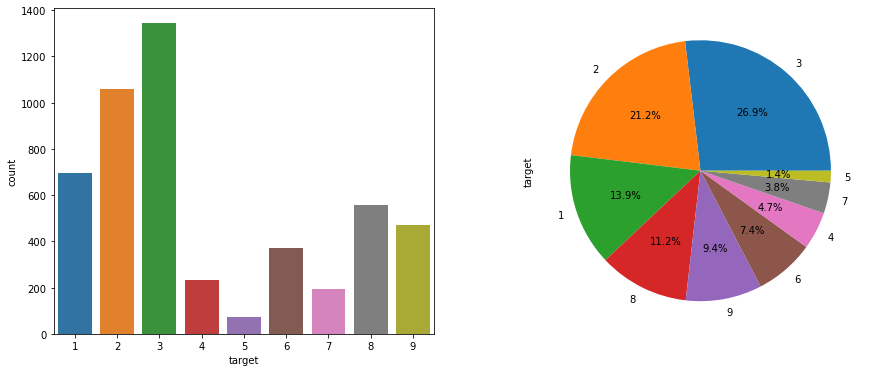

In [34]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='target', data=df, ax=ax[0])
_ = df['target'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

## Correlation
There seems very less correlation but also due to the number of features it is tough to identify the correlations

<AxesSubplot:>

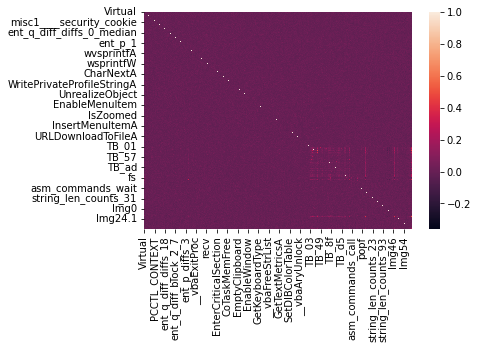

In [8]:
sns.heatmap(df.corr())

In [9]:
X = df.drop(columns = ['target'])
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

## Lets Train a Basic model to observe the Nature of the data.
The Below Logistic Model will Let us know about how the data should be handled further.

# Logistic Regression

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [12]:
print("Accuracy: ", classifier.score(X_test, y_test) * 100)

Accuracy:  56.39999999999999


## Feature Selection
We will be using the `SelectFromModel` feature selection technique <br>
Here after traning a basic logistic we will be using which give high importance to the features.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

### Regularization

### To reduce the importance of the features which contributes less in the predictions, we are using L2 regularization.
L2 regularization, also known as ridge regression, adds the "squared magnitude" of the coefficient to the loss function as a penalty term.


In [14]:
logistic = LogisticRegression(C=1, penalty="l2", solver="liblinear", random_state=2).fit(X,Y)
model = SelectFromModel(logistic, prefit=True)

In [15]:
X_new = model.transform(X)

In [16]:
coef = logistic.coef_[0]
imp_features = pd.Series(X.columns)[list(coef>0)]


## Below we can see the Important features 

In [17]:
X = X[imp_features]
X.columns

Index(['Offset', 'loc', 'var', 'WORD', 'large', 'short', 'dw', 'XREF', 'dword',
       'locret',
       ...
       'Img86', 'Img88', 'Img92', 'Img93', 'Img94', 'Img96', 'Img101',
       'Img103', 'Img105', 'Img106'],
      dtype='object', length=786)

In [18]:
X.shape

(4999, 786)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

## Scaling the Train and Test Data
For this we will be usig the `StandardScaler` form sklearn

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(X_train, y_train)
# Predicting the Test set results
y_pred = lr.predict(X_test)

## As we can see The as Logistic doesn't seems suitable to this data
We will be using much advanced model for further training.

In [22]:
print("Accuracy: ", lr.score(X_test, y_test) * 100)

Accuracy:  50.2


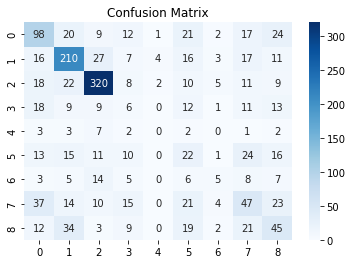

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

## For Each Model We will be using multiple Metrics to judge the performance of the model
A predictive model's performance is quantified by an evaluation metric. This usually entails training a model on a dataset, then using the model to generate predictions on a holdout dataset that was not used during training, and finally comparing the predictions to the predicted values in the holdout dataset.

# SVM

In [24]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [25]:
y_pred = svm.predict(X_test) 
y_pred

array([8, 2, 2, ..., 1, 2, 3], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.598


array([[132,  21,  15,   0,   0,   0,   0,  36,   0],
       [ 17, 256,  12,   0,   0,   0,   0,  24,   2],
       [  3,  10, 387,   0,   0,   0,   0,   4,   1],
       [ 24,  11,  17,   0,   0,   0,   0,  25,   2],
       [  3,   3,   9,   0,   0,   1,   0,   3,   1],
       [ 17,  21,  28,   0,   0,   3,   0,  38,   5],
       [  4,   4,  22,   0,   0,   1,   0,  17,   5],
       [ 48,  13,  17,   0,   0,   4,   0,  88,   1],
       [ 16,  45,   7,   0,   0,   1,   0,  45,  31]], dtype=int64)

# Training KNN

For the KNN we have used the K values as 2 and added the evaluation metrics to measure the performance of the model.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support,classification_report
import time
start = time.time()

knn =  KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
print(knn)
y_pred=knn.predict(X_test)

end = time.time()

print("Accuracy:",accuracy_score(y_test, y_pred))

print(end-start)

cm = confusion_matrix(y_test,y_pred)
print(cm)

TP =cm[0][0]
FN =cm[0][1]
TN = cm[1][1]
FP = cm[1][0]

print("TP: ", TP)
print("TN", TN)
print("FP", FP)
print("FN", FN)

Precision = (TP / (TP+FP))
Recall = (TP / (TP+FN))

print("Accuracy    :", ((TP+TN) / (TP+FP+FN+TN)))
print("Precision   :", (TP / (TP+FP)))
print("Recall      :", (TP / (TP+FN)))
print("Specificity :", (TN / (TN+FP)) )
print("F1 Score    :",  ((2 * Precision * Recall) / (Precision + Recall)))

print(classification_report(y_test, y_pred))

KNeighborsClassifier(n_neighbors=2)
Accuracy: 0.264
0.16669797897338867
[[  5  79  42   6   1  38   2  20  11]
 [  2 200  57   1   2  27   4  12   6]
 [  4 118 137  12   6  78   7  29  14]
 [  1  30  16   1   1  17   4   4   5]
 [  0   6   7   0   0   4   0   3   0]
 [  0  43  25   5   3  19   4  10   3]
 [  1  21  11   2   1  11   1   3   2]
 [  2  53  46   2   2  31   4  23   8]
 [  2  56  28   2   0  26   4  17  10]]
TP:  5
TN 200
FP 2
FN 79
Accuracy    : 0.7167832167832168
Precision   : 0.7142857142857143
Recall      : 0.05952380952380952
Specificity : 0.9900990099009901
F1 Score    : 0.10989010989010989
              precision    recall  f1-score   support

           1       0.29      0.02      0.05       204
           2       0.33      0.64      0.44       311
           3       0.37      0.34      0.35       405
           4       0.03      0.01      0.02        79
           5       0.00      0.00      0.00        20
           6       0.08      0.17      0.10       112
     

## In the Grid Search for KNN we have fount the Best value for K is 15, <br>Because after that we can see an almost flat line for Error curve

Text(0, 0.5, 'Mean Error')

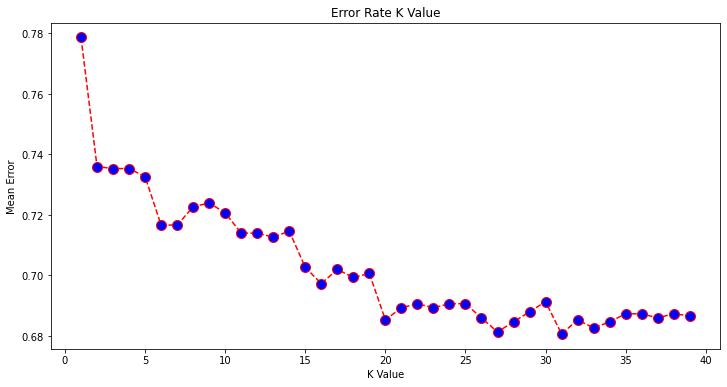

In [28]:
import numpy as np
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')


# Decision Tree

In [29]:
start = time.time()
from sklearn import tree

dt = tree.DecisionTreeClassifier().fit(X_train,y_train)
print(dt)
y_pred=dt.predict(X_test)
end = time.time()

print("Accuracy:",accuracy_score(y_test, y_pred))
print(end-start)



cm = confusion_matrix(y_test,y_pred)
print(cm)

TP =cm[0][0]
FN =cm[0][1]
TN = cm[1][1]
FP = cm[1][0]

print("TP: ", TP)
print("TN", TN)
print("FP", FP)
print("FN", FN)

Precision = (TP / (TP+FP))
Recall = (TP / (TP+FN))

print("Accuracy    :", ((TP+TN) / (TP+FP+FN+TN)))
print("Precision   :", (TP / (TP+FP)))
print("Recall      :", (TP / (TP+FN)))
print("Specificity :", (TN / (TN+FP)) )
print("F1 Score    :",  ((2 * Precision * Recall) / (Precision + Recall)))

print(classification_report(y_test, y_pred))

DecisionTreeClassifier()
Accuracy: 0.7633333333333333
3.0829708576202393
[[159  10   3   4   3   4   7  10   4]
 [  8 262   7   8   6   6   4   2   8]
 [ 10  11 344   2  13   4   6  11   4]
 [  9   3   4  46   1   1   3   4   8]
 [  2   4   4   0   5   2   0   2   1]
 [  6   7  10   5   1  63   3  10   7]
 [  1   3   7   4   1   0  31   3   3]
 [ 21  16   5   4   0   4   3 112   6]
 [  4   8   2   1   0   3   0   4 123]]
TP:  159
TN 262
FP 8
FN 10
Accuracy    : 0.958997722095672
Precision   : 0.9520958083832335
Recall      : 0.9408284023668639
Specificity : 0.9703703703703703
F1 Score    : 0.9464285714285714
              precision    recall  f1-score   support

           1       0.72      0.78      0.75       204
           2       0.81      0.84      0.83       311
           3       0.89      0.85      0.87       405
           4       0.62      0.58      0.60        79
           5       0.17      0.25      0.20        20
           6       0.72      0.56      0.63       112
     

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {"max_depth": [3,5, 7, 10],
              "n_estimators":[3,5,10,25],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=10;

[CV 5/5] END max_depth=5, max_features=4, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=4, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=4, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=4, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=4, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=4, n_estimators=25;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=7, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=7, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=7, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=7, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=7, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, 

[CV 4/5] END max_depth=7, max_features=7, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=7, max_features=7, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=7, max_features=7, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END max_depth=7, max_features=7, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END max_depth=7, max_features=7, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END max_depth=7, max_features=7, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END max_depth=7, max_features=7, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END max_depth=7, max_features=7, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END max_depth=7, max_features=7, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END max_depth=7, max_features=7, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5] END max_depth=7, max_features=7, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5] END max_depth=

[CV 5/5] END max_depth=10, max_features=15, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, max_features=15, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=15, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=15, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, max_features=15, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, max_features=15, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, max_features=15, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=15, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=15, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, max_features=15, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, max_features=15, n_estimators=10;, score=nan total time=   0.0s
[CV 1

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25]},
             scoring='recall', verbose=4)

In [32]:
#use the best params above to create a random forest classifier
rf = RandomForestClassifier(max_depth=grid_search.best_params_.get('max_depth'), max_features=grid_search.best_params_.get('max_features'), 
                            n_estimators=grid_search.best_params_.get('n_estimators'), random_state=2)

#training with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=4, n_estimators=3,
                       random_state=2)

In [33]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Performance of the model
# print("Accuracy: ", accuracy_score(y_test,y_pred))

print("\n")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")
print(classification_report(y_test, y_pred))



Predicted   1    2    3    6  7    8   9   All
True                                          
1          48  102    5    3  0   43   3   204
2           1  298    4    4  0    1   3   311
3           1    8  391    0  0    4   1   405
4           3   12   12   40  0   10   2    79
5           0    8    6    5  0    0   1    20
6           3   37   11   47  4   10   0   112
7           1   10   30    5  3    3   1    53
8          13   24    9   17  0  108   0   171
9           1   69   46    5  0    9  15   145
All        71  568  514  126  7  188  26  1500


              precision    recall  f1-score   support

           1       0.68      0.24      0.35       204
           2       0.52      0.96      0.68       311
           3       0.76      0.97      0.85       405
           4       0.00      0.00      0.00        79
           5       0.00      0.00      0.00        20
           6       0.37      0.42      0.39       112
           7       0.43      0.06      0.10        53

# Conclusion

### After Training Multiple Models It have been observed that `Decision Tree` gave the better result with Accuracy on unseen data as `80%`

For improving the other models we can try more hyper parameter tuning with Grid Search and K Fold <br>
We might have attempted other techniques to reduce overfitting in the Random Forest model, such as adding another tuning parameter, min samples leaf, and choosing a higher value for the range of values to be tweaked.

The virus of class 2 and 3 has the most predicitons. The class imbalance problem should be resolved in model running. We can adjust class weight in the running model using the parameter class_weight. 